## Introduction to Neural Networks

<br>
Artificial Neural Networks (ANN) is a machine learning algorithm inspired by how neurons work in our brain. A biological neuron receives inputs from upstream neurons, and whenever the membrane potential of the neuron exceeds a certain threshold, signals will be sent to connecting downstream neurons in the form of voltage spikes. The effect of different inputs are controlled by separate synaptic weights. As various inputs change with time, synapse weights adapt and the entire network can learn useful computations.  
<br>
A typical ANN consists of few main components, inputs, weights, and outputs. Two main types of neural networks atchitechture are feed forward networks and recurrent networks. Feed forward trains weights from one layer ot another, while recurrent networks may feed back the weights of itself. We will start with the most simple version of NN.  

### 1. Perceptron

<br>
A good and simple way to appreciate the nuances of neural networks is to construct a perceptron. Perceptron is a linear binary classifer. Given inputs $x_i \ (i=1, 2, ...n)$ and binary output target $y$, we want to learn weights $w_i$ and bias term $b$, from which $y$ can be successfully classified with equation 
<br>
<br>
$$
\begin{equation*}
y = f(\vec{x}) = 
\begin{cases}
1  & if & \sum_{i}w_i x_i + b > 0 \\
0  & if & \sum_{i}w_i x_i + b \le 0 \\
\end{cases}
\end{equation*}
$$
<br>
This example is equivalent to a neural network of 1 layer. The perceptron algorithm training procedures are:
1. If output is correct, we do not update the weights. 
2. If output is misclassified as 1, subtract input vector from weight vector, and subtract 1 from bias.  
3. If output is misclassified as 0, add input vector to weight vector, and add 1 to bias. 


The procedure is guaranteed to find solutions for $\vec{w}$ and $b$ that satisfy all training data, if such solutions exist. 

In [1]:
import numpy as np 

def forward_propagation(W, X, b):
    """
        Args: 
            W (array): weight vector
            X (array): input vector
            b (float): bias 
        Returns:
            predicted binary output 
    """
    s = np.dot(W, X) + b
    return s > 0

In [2]:

def update_weights(output, W, X, b):
    """
        Args: 
            W (array): weight vector
            X (array): input vector
            b (float): bias 
        Returns:
            W (array): updated weight vector
            b (float): updated bias 
    """
    pred_output = forward_propagation(W, X, b)
    W += (output - pred_output) * X
    b += (output - pred_output) 
    return W, b  
    

In [3]:
forward_propagation([1.2, 1], [-1, 0], .2)

False

### 2. Learning Weghts for 2D Perceptron

If the dimension of our input is 2D, the weights and bias together represent a linear equation in the input space that separates the 2D plane into two parts, one for cases with output = 1 and the other for cases with output = 0. 

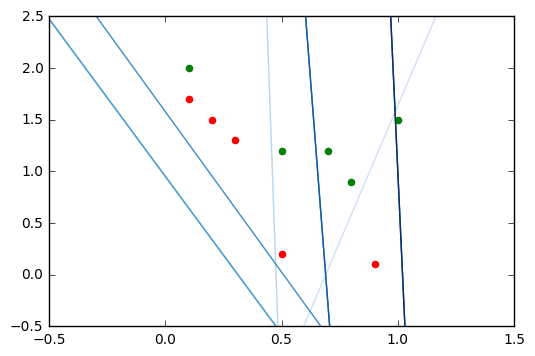

In [4]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

X = 0.1 * np.array([[8, 9],
                  [5, 12],
                  [1, 20],
                  [10, 15],
                  [7, 12],
                  [5, 2],
                  [1, 17],
                  [2, 15],
                  [9, 1],
                  [3, 13]])

y = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
x_line = np.arange(-5, 5)
w = [5, -2]
b = -5

shade = cm.Blues(np.linspace(0.2, 1, len(X)))
for j in range(len(X)):
    color = 'r'
    w, b = update_weights(y[j], w, X[j], b)
    y_line = (-w[0] * x_line - b)/ w[1]  
    if y[j] == 1:
        color = 'g'
    plt.scatter(X[j][0], X[j][1], color=color)
    plt.plot(x_line, y_line, color=shade[j])


axes = plt.gca()
axes.set_xlim([-0.5, 1.5])
axes.set_ylim([-0.5, 2.5])
plt.show()

### 3. Limitations of Perceptron